In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Display settings
pd.set_option('display.max_columns', None)
sns.set(style = 'whitegrid')

df_car = pd.read_csv('car_resale_prices.csv')

df_car.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [6]:
df_car.shape
df_car.info()
df_car.describe()
df_car.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [7]:
df_car = df_car.dropna(subset=['kms_driven','max_power','seats','mileage','engine_capacity'])

def clean_price(value):
    if pd.isna(value):
        return np.nan

    value = str(value).replace('â‚¹','').replace('₹','').replace(',','').strip()

    if 'Lakh' in value:
        num = float(re.findall(r'[\d\.]+',value)[0])
        return num*100000
    elif 'Crore' in value:
        num = float(re.findall(r'[\d\.]+',value)[0])
        return num*10000000
    else:
        try:
            return float(value)
        except:
            return np.nan

df_car['resale_price'] = df_car['resale_price'].apply(clean_price)

def clean_value(value):
    return float(re.findall(r'[\d\.]+',value)[0])

def clean_cc(value):
    return int(re.findall(r'[\d]+',value)[0])

def clean_kms(value):
    num = value.replace(',','')
    return int(re.findall(r'[\d\,]+',num)[0])

    
df_car['engine_capacity'] = df_car['engine_capacity'].apply(clean_cc)
    
df_car['kms_driven'] = df_car['kms_driven'].apply(clean_kms)

df_car['max_power'] = df_car['max_power'].apply(clean_value)

df_car['mileage'] = df_car['mileage'].apply(clean_value)

df_car = df_car.fillna({
    # 'registered_year':np.nan,
    'engine_capacity':'Not Specified',
    'insurance ':'Not Specified',
    'owner_type':'Not Specified'
})

df_car.drop_duplicates(inplace = True)

df_car['registered_year'] = pd.to_datetime(df_car['registered_year'], format = '%b-%y', errors = 'coerce').dt.year
df_car = df_car.dropna(subset=['registered_year'])
df_car['registered_year'] = df_car['registered_year'].astype(int)

Q1 = np.percentile(df_car['resale_price'],25)
Q3 = np.percentile(df_car['resale_price'],75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
higher = Q3 + 1.5 * IQR

filtered_data = df_car[(df_car['resale_price'] >= lower) & (df_car['resale_price'] <= higher)]

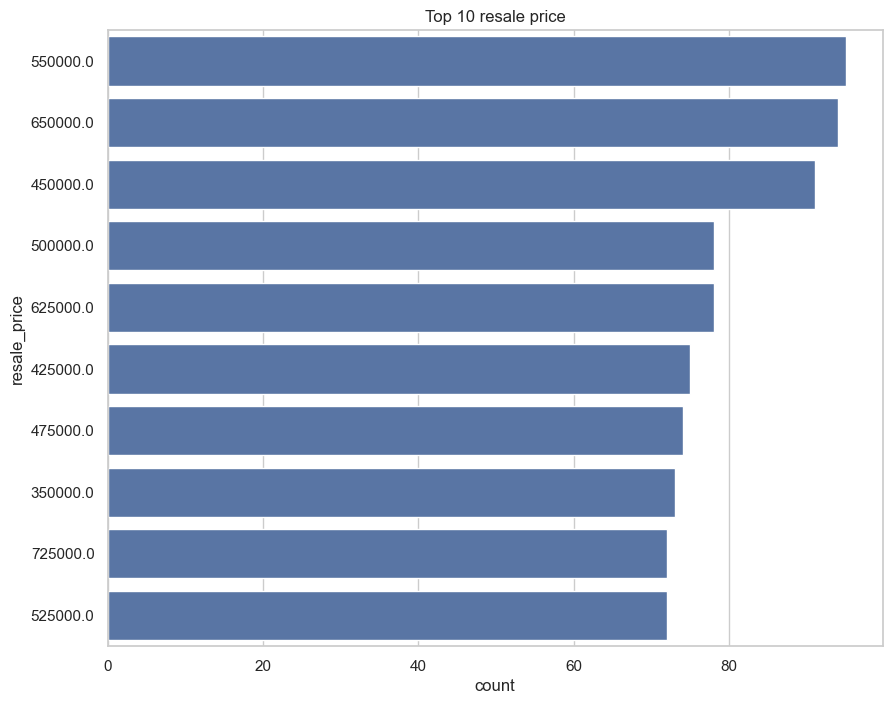

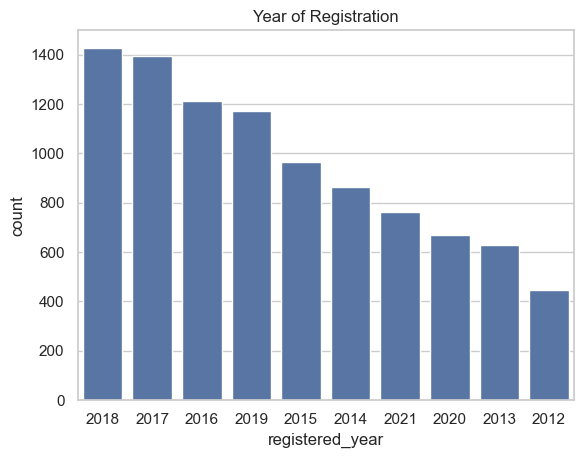

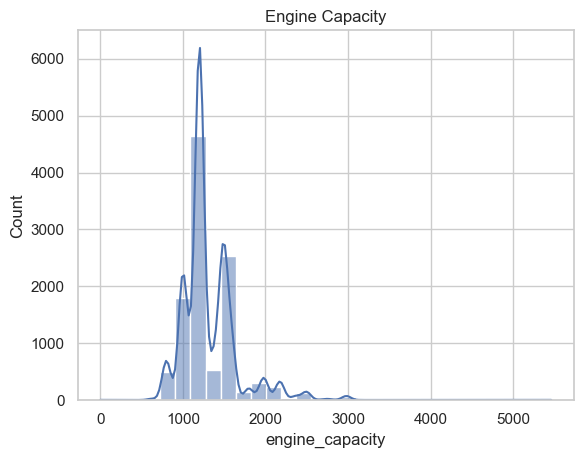

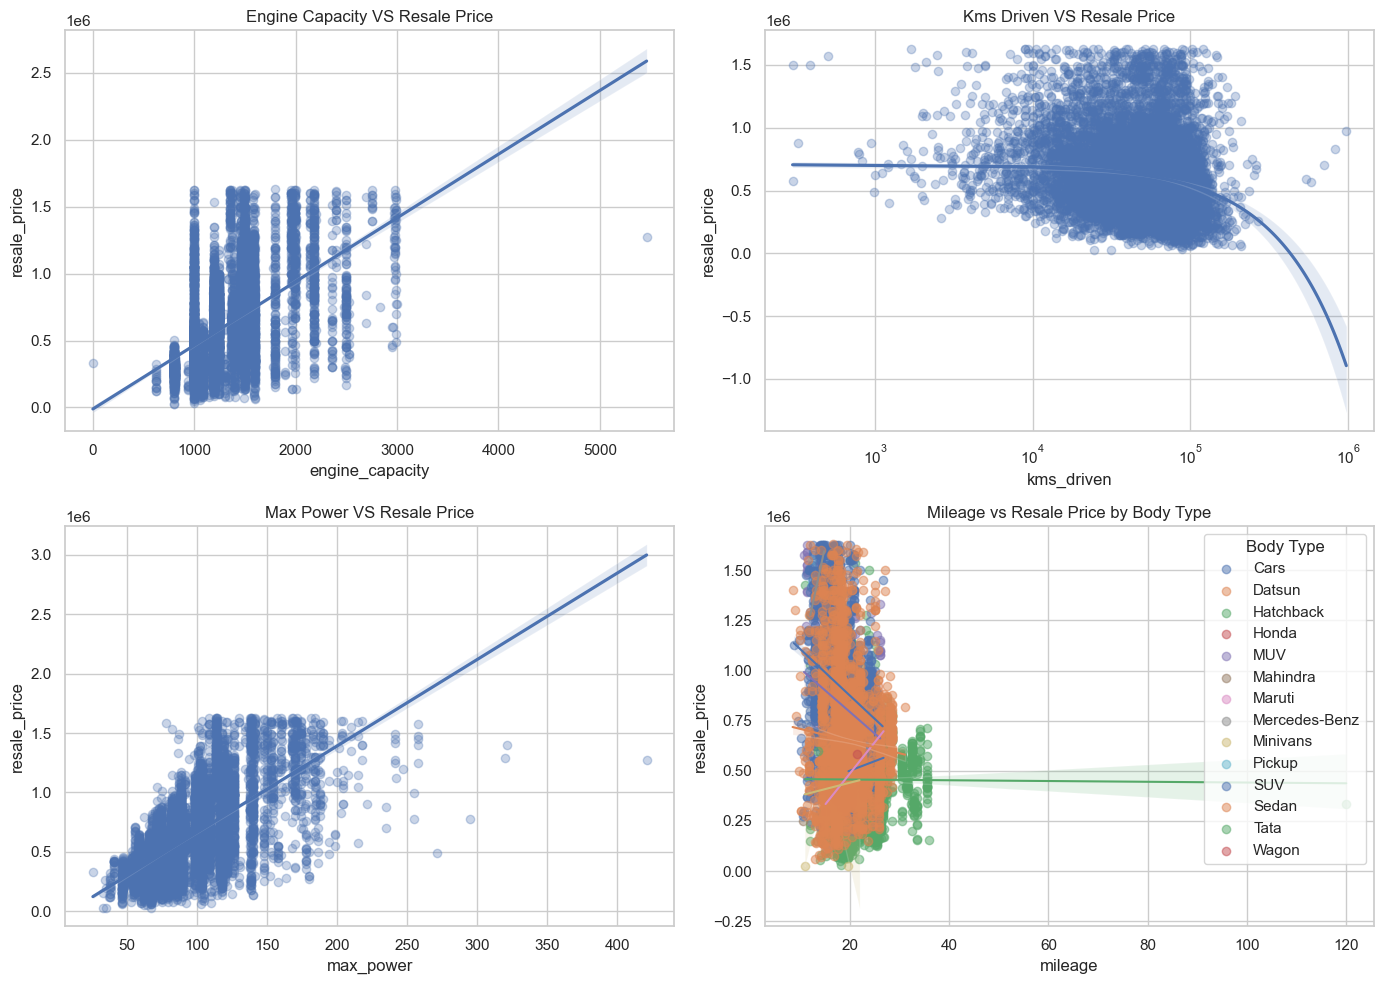

In [8]:
plt.figure(figsize = (10,8))
sns.countplot(y = 'resale_price',data = filtered_data,order = filtered_data['resale_price'].value_counts().index[:10])
plt.title('Top 10 resale price')
plt.show()

sns.countplot(x = 'registered_year',data = filtered_data,order = filtered_data['registered_year'].value_counts().index[:10])
plt.title('Year of Registration')
plt.show()

sns.histplot(filtered_data['engine_capacity'], bins = 30, kde = True)
plt.title('Engine Capacity')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(x = 'engine_capacity', y = 'resale_price', data = filtered_data, ax = axes[0,0], scatter_kws = {'alpha':0.3})
axes[0,0].set_title('Engine Capacity VS Resale Price')

sns.regplot(x = 'kms_driven', y = 'resale_price', data = filtered_data, ax = axes[0,1], scatter_kws = {'alpha':0.3})
axes[0,1].set_title('Kms Driven VS Resale Price')
axes[0,1].set_xscale('log')

sns.regplot(x = 'max_power', y = 'resale_price', data = filtered_data, ax = axes[1,0], scatter_kws = {'alpha':0.3})
axes[1,0].set_title('Max Power VS Resale Price')

for name, group in filtered_data.groupby('body_type'):
    sns.regplot(
        data=group, x='mileage', y='resale_price',
        ax=axes[1, 1],
        label=name,
        scatter_kws={'alpha':0.5},
        line_kws={'lw':1.5}
    )

axes[1, 1].legend(title='Body Type')
axes[1, 1].set_title("Mileage vs Resale Price by Body Type")

plt.tight_layout()
plt.show()



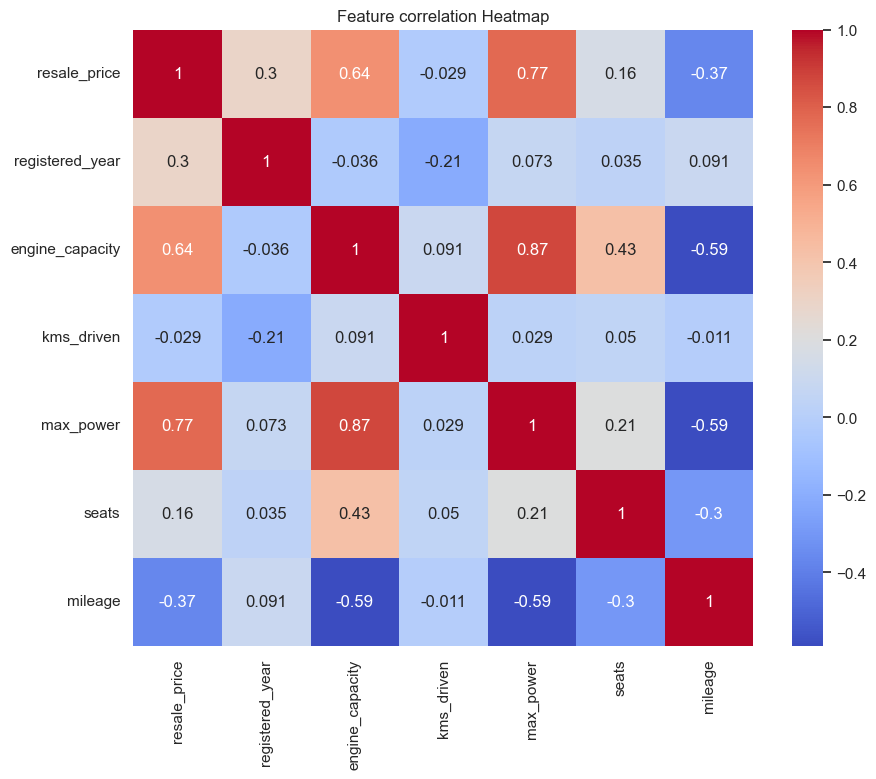

In [20]:
numeric_df = df_car.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(columns = ['Unnamed: 0'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Feature correlation Heatmap')
plt.show()

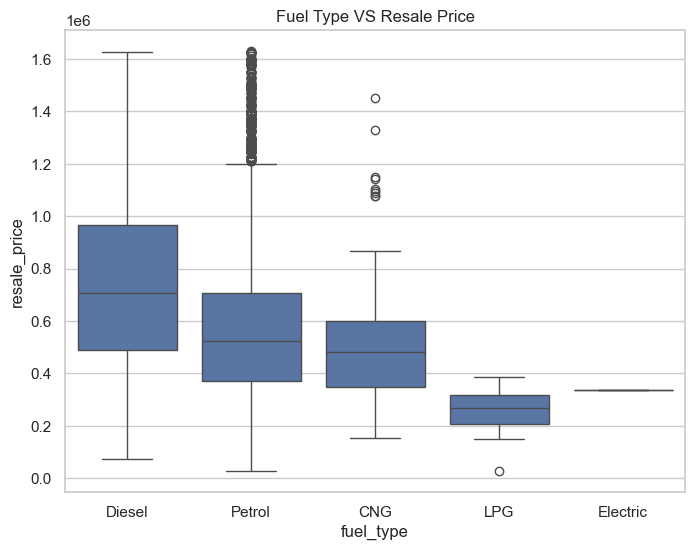

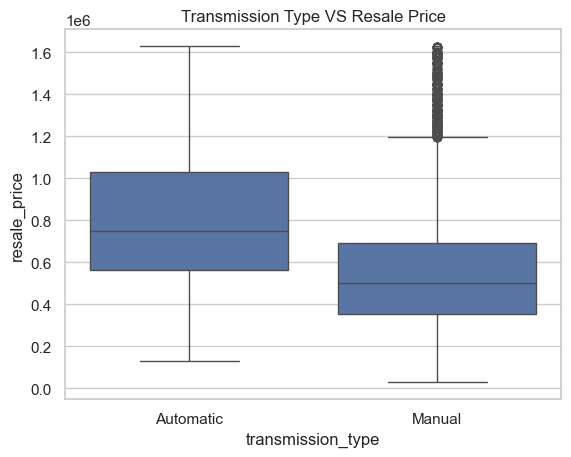

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'fuel_type', y = 'resale_price',data = filtered_data)
plt.title('Fuel Type VS Resale Price')
plt.show()

sns.boxplot(x = 'transmission_type', y = 'resale_price', data = filtered_data)
plt.title('Transmission Type VS Resale Price')
plt.show()

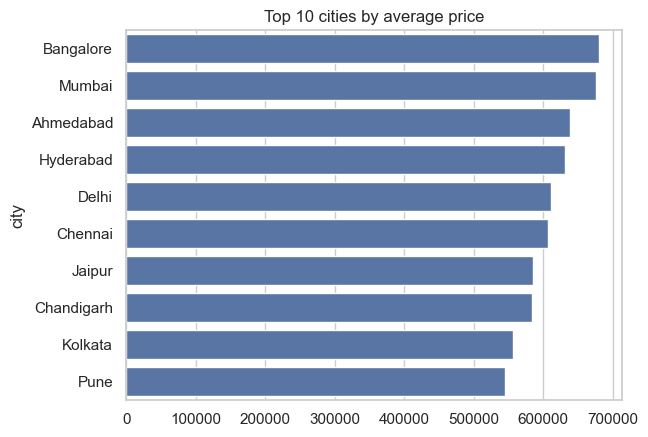

In [27]:
top_cities = filtered_data.groupby('city')['resale_price'].mean().sort_values(ascending = False).head(10)
sns.barplot(x = top_cities.values, y = top_cities.index)
plt.title('Top 10 cities by average price')
plt.show()